In [1]:
student_per_p = 'student-por.csv'

In [2]:
import pandas as pd

In [3]:
student_per = pd.read_csv(student_per_p, sep=';', decimal='.', header=0, names=['school', 'sex', 'age',
                                                                                  'address', 'famsize',
                                                                                  'pstatus', 'medu', 'fedu',
                                                                                  'mjob', 'fjob', 'reason',
                                                                                  'guardian', 'traveltime',
                                                                                  'studytime', 'failures',
                                                                                  'schoolsup', 'famsup',
                                                                                  'paid', 'activities',
                                                                                  'nursery', 'higher', 'internet',
                                                                                  'romantic', 'famrel', 'freetime',
                                                                                  'goout', 'dalc', 'walc', 'health',
                                                                                  'absences', 'grade1', 'grade2',
                                                                                  'finalgrade'],index_col=False)

In [4]:
#Keep only the columns we are interested in
student_per = student_per.drop(['school', 'sex', 'age', 'famsize', 'medu', 'fedu', 'mjob', 'fjob', 'reason',
                               'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                               'higher', 'internet', 'freetime', 'goout', 'dalc', 'grade1', 'grade2'], axis=1)

In [5]:
import numpy as np

In [6]:
#convert strings into int
student_per['address'] = np.where(student_per['address']== 'U', 1, student_per['address'])
student_per['address'] = np.where(student_per['address'] == 'R', 0, student_per['address'])
student_per['address'].value_counts()

1    452
0    197
Name: address, dtype: int64

In [7]:
student_per['pstatus'] = np.where(student_per['pstatus'] == 'A', 0, student_per['pstatus'])
student_per['pstatus'] = np.where(student_per['pstatus'] == 'T', 1, student_per['pstatus'])
student_per['pstatus'].value_counts()


1    569
0     80
Name: pstatus, dtype: int64

In [8]:
student_per['guardian'] = np.where(student_per['guardian'] == 'mother', 0, student_per['guardian'])
student_per['guardian'] = np.where(student_per['guardian'] == 'father', 1, student_per['guardian'])
student_per['guardian'] = np.where(student_per['guardian'] == 'other', 2, student_per['guardian'])
student_per['guardian'].value_counts()

0    455
1    153
2     41
Name: guardian, dtype: int64

In [9]:
student_per['romantic'] = np.where(student_per['romantic'] == 'no', 0, student_per['romantic'])
student_per['romantic'] = np.where(student_per['romantic'] == 'yes', 1, student_per['romantic'])
student_per['romantic'].value_counts()

0    410
1    239
Name: romantic, dtype: int64

In [10]:
#get target values, split grades
student_per['finalgrade'] = np.where(student_per['finalgrade'].between(0,4), 0, student_per['finalgrade'])
student_per['finalgrade'] = np.where(student_per['finalgrade'].between(5,9), 1, student_per['finalgrade'])
student_per['finalgrade'] = np.where(student_per['finalgrade'].between(10,14), 2, student_per['finalgrade'])
student_per['finalgrade'] = np.where(student_per['finalgrade'].between(15,20), 3, student_per['finalgrade'])
 
student_per['finalgrade'].value_counts()

2    418
3    131
1     84
0     16
Name: finalgrade, dtype: int64

In [11]:
target = student_per.finalgrade

In [12]:
#get features
data = student_per[['address', 'pstatus', 'guardian', 'traveltime', 'romantic', 'famrel', 'walc', 'health', 'absences']]

In [13]:
#import statements
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [14]:
#Model: 50% for training and 50% for testing
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.5, random_state=0)

In [15]:
#To find out optimum value of K
k_range = range(1,25)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train,y_train)
        y_pred=knn.predict(x_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

<function matplotlib.pyplot.show>

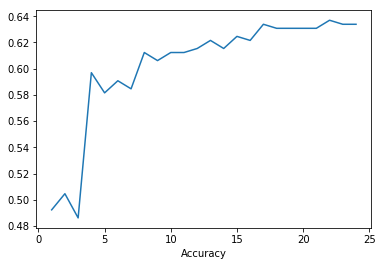

In [16]:
#Plotting the results from above code to get an idea about the accuracy
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range,scores_list)
plt.xlabel('Value for K')
plt.xlabel('Accuracy')
plt.show

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [18]:
#Fitting training data with K as 5
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
fit = knn.fit(x_train,y_train)

In [19]:
y_pre = fit.predict(x_test)

In [20]:
#Checking the accuracy 
knn.score(x_test, y_test)

0.56

In [21]:
cm = confusion_matrix(y_test, y_pre)

In [22]:
print cm

[[  0   0   8   3]
 [  0   2  39   4]
 [  0   9 171  27]
 [  1   1  51   9]]


In [23]:
from sklearn.metrics import classification_report

In [24]:
print classification_report(y_test, y_pre)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.17      0.04      0.07        45
           2       0.64      0.83      0.72       207
           3       0.21      0.15      0.17        62

   micro avg       0.56      0.56      0.56       325
   macro avg       0.25      0.25      0.24       325
weighted avg       0.47      0.56      0.50       325



In [25]:
#Model: 60% for training and 40% for testing
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.4, random_state=0)

In [26]:
#To find out optimum value of K
k_range = range(1,25)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train,y_train)
        y_pred=knn.predict(x_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

<function matplotlib.pyplot.show>

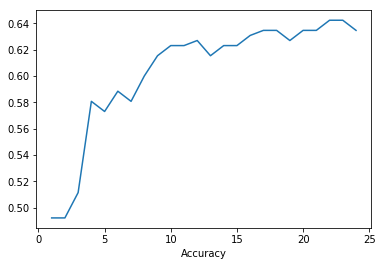

In [27]:
#Plotting the results from above code to get an idea about the accuracy
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range,scores_list)
plt.xlabel('Value for K')
plt.xlabel('Accuracy')
plt.show

In [28]:
#Fitting training data with K as 5
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
fit = knn.fit(x_train,y_train)

In [29]:
y_pre = fit.predict(x_test)

In [30]:
#Checking the accuracy 
knn.score(x_test, y_test)

0.573076923076923

In [31]:
cm = confusion_matrix(y_test, y_pre)

In [32]:
print cm

[[  0   0   6   2]
 [  0   2  30   3]
 [  0  10 141  16]
 [  1   1  42   6]]


In [33]:
print classification_report(y_test, y_pre)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.15      0.06      0.08        35
           2       0.64      0.84      0.73       167
           3       0.22      0.12      0.16        50

   micro avg       0.57      0.57      0.57       260
   macro avg       0.25      0.26      0.24       260
weighted avg       0.48      0.57      0.51       260



In [34]:
#Model: 80% for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.4, random_state=0)

In [35]:
#To find out optimum value of K
k_range = range(1,25)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train,y_train)
        y_pred=knn.predict(x_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

<function matplotlib.pyplot.show>

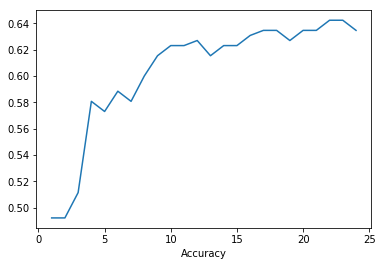

In [36]:
#Plotting the results from above code to get an idea about the accuracy
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range,scores_list)
plt.xlabel('Value for K')
plt.xlabel('Accuracy')
plt.show

In [37]:
#Fitting training data with K as 5
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
fit = knn.fit(x_train,y_train)

In [38]:
y_pre = fit.predict(x_test)

In [39]:
#Checking the accuracy 
knn.score(x_test, y_test)

0.573076923076923

In [40]:
cm = confusion_matrix(y_test, y_pre)

In [41]:
print cm

[[  0   0   6   2]
 [  0   2  30   3]
 [  0  10 141  16]
 [  1   1  42   6]]


In [42]:
print classification_report(y_test, y_pre)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.15      0.06      0.08        35
           2       0.64      0.84      0.73       167
           3       0.22      0.12      0.16        50

   micro avg       0.57      0.57      0.57       260
   macro avg       0.25      0.26      0.24       260
weighted avg       0.48      0.57      0.51       260

